## This project aims to build a collaborative recommender system on the given dataset

## the dataset contains two columns:
1. customer ID 
2. rating given by the customer for the movie

### importing basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

importing the dataset


In [11]:
data = pd.read_csv('combined_data_1.txt')

OSError: [Errno 22] Invalid argument: 'combined_data_1.txt'

In [10]:
data=pd.read_csv("combined_data_1.txt",header=None,usecols=[0,1],names=["custid","rating"])

OSError: [Errno 22] Invalid argument: 'combined_data_1.txt'

In [ ]:
data

,custid,rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


basic EDA

In [ ]:
data.isnull().sum()

custid       0
rating    4499
dtype: int64

total number of movies:

In [ ]:
movie_count=data.isnull().sum()["rating"]

In [ ]:
# customer counts
cust_count=data["custid"].nunique()-movie_count

In [ ]:
cust_count

470758

number of ratings given:

In [ ]:
rating_count=len(data)-movie_count

In [ ]:
rating_count

24053764

In [ ]:
rated = data["rating"].value_counts()

<Axes: xlabel='rating'>

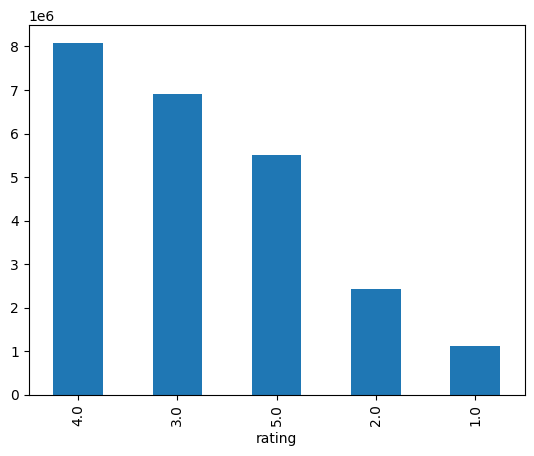

In [ ]:
rated.plot(kind = 'bar')

In [ ]:
movie_id = None
movieid = []
for i in data['custid']:
    if ':' in i:
        movie_id = int(i.replace(':',''))
    movieid.append(movie_id)


In [ ]:
data['movie_id'] = movieid

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.sample(5)

,custid,rating,movie_id
5574650,1718861,2.0,1116
17283207,2507507,3.0,3320
11318863,1860383,5.0,2171
16162252,1224003,3.0,3138
18745999,232615,4.0,3605


In [ ]:
dataset_movie_summary=data.groupby('movie_id')['rating'].agg(["count"])

In [ ]:
dataset_movie_summary

,count
movie_id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


setting benchmark of 60 percentile i.e. a movie must have a minimum number of 60 percentile ratings and drop movie that donot satisfy the condition

In [ ]:
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.6),0)
movie_benchmark

908.0

list of indices for movies to be dropped


In [ ]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Int64Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
            ...
            4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
           dtype='int64', name='movie_id', length=2699)

setting a benchmark for customers to be considered based on the number of ratings given and drop those customer who have given less number of ratings


In [ ]:
# Filtering customers
dataset_cust_summary=data.groupby('custid')['rating'].agg(["count"])
dataset_cust_summary.head(5)

,count
custid,
10,49
1000004,1
1000027,30
1000033,101
1000035,20


In [ ]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.6),0)
cust_benchmark

36.0

In [ ]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
len(drop_cust_list)

282042

In [ ]:
data=data[~data['movie_id'].isin(drop_movie_list)]
data=data[~data['custid'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(data.shape))

After the triming, the shape is: (19695836, 3)


In [ ]:
df_title = pd.read_csv("movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])



In [ ]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

ModuleNotFoundError: No module named 'surprise'

In [ ]:
read=Reader()

In [ ]:
data=Dataset.load_from_df(data[['custid','movie_id','rating']][:1000000],read)

using SVD to operate on latent features of user and items


In [ ]:
model=SVD()

In [ ]:
cross_validate(model,data,measures=['rmse','mae'],cv=3)

{'test_rmse': array([0.96919337, 0.96770781, 0.96807102]),
 'test_mae': array([0.75793278, 0.758401  , 0.75695505]),
 'fit_time': (22.248928785324097, 20.98887300491333, 26.232672452926636),
 'test_time': (4.350017786026001, 5.1674559116363525, 4.240899085998535)}

In [ ]:
netflix_dataset.head()

,CustID,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


doing prediction and recomendation for any random customer

In [ ]:
user_1335454=df_title.copy()

In [ ]:
user_1335454

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_1335454=user_1335454[~user_1335454['movie_id'].isin(drop_movie_list)]
user_1335454

,Movie_Id,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_1335454['Estimate_Score']=user_1335454['movie_id'].apply(lambda x: model.predict(1335454, x).est)


In [ ]:
user_1335454

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.720000
4,5,2004.0,The Rise and Fall of ECW,4.379569
5,6,1997.0,Sick,3.331679
7,8,2004.0,What the #$*! Do We Know!?,3.653611
15,16,1996.0,Screamers,3.303145
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.829728
17766,17767,2004.0,Fidel Castro: American Experience,3.829728
17767,17768,2000.0,Epoch,3.829728
17768,17769,2003.0,The Company,3.829728


In [ ]:
user_1335454=user_1335454.sort_values('Estimate_Score',ascending=False)
user_1335454

,Movie_Id,Year,Name,Estimate_Score
32,33,2000.0,Aqua Teen Hunger Force: Vol. 1,5.000000
269,270,2001.0,Sex and the City: Season 4,4.695983
67,68,2004.0,Invader Zim,4.682752
223,224,1999.0,Midsomer Murders: Blood Will Out,4.524632
31,32,2004.0,ABC Primetime: Mel Gibson's The Passion of the...,4.442562
...,...,...,...,...
94,95,1985.0,Dona Herlinda and Her Son,2.971603
25,26,2004.0,Never Die Alone,2.841219
224,225,2004.0,The Cookout,2.809360
187,188,2005.0,Dead Birds,2.593304


In [ ]:
user_1335454.head()["Name"]

32                        Aqua Teen Hunger Force: Vol. 1
269                           Sex and the City: Season 4
67                                           Invader Zim
223                     Midsomer Murders: Blood Will Out
31     ABC Primetime: Mel Gibson's The Passion of the...
Name: Name, dtype: object